###### CSCE 320 :: Principles of Data Science ::Texas A&M University :: Fall 2020


# Homework 3: Data Visualization

### 100 points [6% of your final grade]
### Due: October 2 by 11:59pm

*Goals of this homework:* In this homework, you will create a data visualization based on an exploration of datasets we provide. Your visualization should capture Tufte's principles of graphical excellence: "complex ideas communicated with clarity, precision, and efficiency."

*Special notes:* Be sure to read over this entire notebook before starting. Before submitting, you are welcome to solicit feedback on your data visualization using Piazza. 

*Submission instructions (Canvas):* To submit your homework, rename this notebook as `UIN_hw3.ipynb`. For example, if your UIN is `123456789`, then your homework submission would be something like `123456789_hw3.ipynb`. Submit this notebook via Canvas (looking for homework 3 under the assignment section).  Your notebook should be completely self-contained, with the results visible in the notebook. We should not have to run any code from the command line, nor should we have to run your code within the notebook (though we reserve the right to do so). So please run all the cells for us, and then submit. **If you inserted any images to the notebook, do upload them as well.**

*Late submission policy:* For this homework, you may use up to three of your late days, meaning that no submissions will be accepted after October 5 at 11:59pm.

### Collaboration declarations:

You should add in all of your collaboration declarations here. 

* Collaboration Declaration 1
* Collaboration Declaration 2
* ...

*Recall our homework collaboration policy: Your homework is yours alone and you are expected to complete each homework independently. Your solution should be written by you without the direct aid or help of anyone else. However, we believe that collaboration and team work are important for facilitating learning, so we encourage you to discuss problems and general problem approaches (but not actual solutions) with your classmates. If you do have a chat with another student about a homework problem, you must inform us by writing a note on your homework submission (e.g., Bob pointed me to the relevant section for problem 3). The basic rule is that no student should explicitly share a solution with another student (and thereby circumvent the basic learning process), but it is okay to share general approaches, directions, and so on. If you feel like you have an issue that needs clarification, feel free to contact either me or the TA.*

## The role of data visualization in a pandemic
COVID-19 pandemic has drastically changed the world and our daily life in many aspects. At this challenging time, data visualization a powerful way for us to identify the development, impact, and even mitigation of the pandemic. Data visualization is also one of the best ways to raise public awareness, drive policymaking, and so on.   

### Assignment goal
Your goal is to (i) identify an interesting story or insight from the COVID-19 data we provide (with or without auxiliary data); and (ii) carefully design a data visualization that communicates this story. You may assume that your audience is the general public.
 
### Grading Breakdown  
10 points: Interestingness and clarity of question you ask  
20 points: Appropriateness of data, scale, and other viz design choices  
15 points: Legends, context, and titles of your viz  
25 points: Overall quality of your viz: in the extreme, every pixel serves a purpose  
15 points: Design rationale (writeup)  
15 points: Pros and cons of your design (writeup)  

## Ingredients in your basket  
Let's take a look at what ingredients you have in hand before beginning. Your assignment package shipped with two data folders:
* COVID-19_Main - which contains [JHU](https://coronavirus.jhu.edu/)'s time series data of confirmed cases / death / recovery by country around the world and the time series data of confirmed cases / death by U.S. county. **You must utilize at least one file from this folder for the assignment.**
* COVID-19_Auxiliary - which contains some sample auxiliary data from resources/databases listed below.   
    * World Bank Open Data: https://data.worldbank.org/indicator?tab=all  
    * Yahoo Financial: https://finance.yahoo.com/quote/ZM/history (You can replace ZM with other stock symbol)  
    * U.S. Bureau of Labor Statistics: https://www.bls.gov/data/  
    * U.S. Energy Information Administration: https://www.eia.gov/petroleum/data.php  
    * U.S. Census Data: https://www.census.gov/data/tables.html  
    **Using auxiliary data is optional for this assignment. You may use any amount of auxiliary data from 1) the COVID-19_Auxiliary folder; 2) resources/databases listed above; and/or 3) any publicly accessible datasets/resources that you deemed useful.** 

## Have a research question in mind
You may feel that there's an overwhelming amount of ingredients available in the world! Having a research question in mind can help you make better selections and decisions for the visualization. Under the ["Critical Trend" section of JHU's Coronavirus Resource Center](https://coronavirus.jhu.edu/data), you can find many examples of research questions answered by visualized data. **Your research question must be different from JHU's.**   
Type your research question below. You may revise it later for better clarity as you progress.

## My research question is: How did Texas' state regulations effect the cumulative number of covid cases per capita in major Texas counties?
(Keep in mind: Your assignment will be graded by interestingness and clarity of question you ask)

## Prepare data
With your research question in mind, you need to identify appropriate data for the visualization that could answer your research question.  

For questions like [Have states flattened the curve?](https://coronavirus.jhu.edu/data/new-cases-50-states), data in the COVID-19_Main folder is sufficient enough.
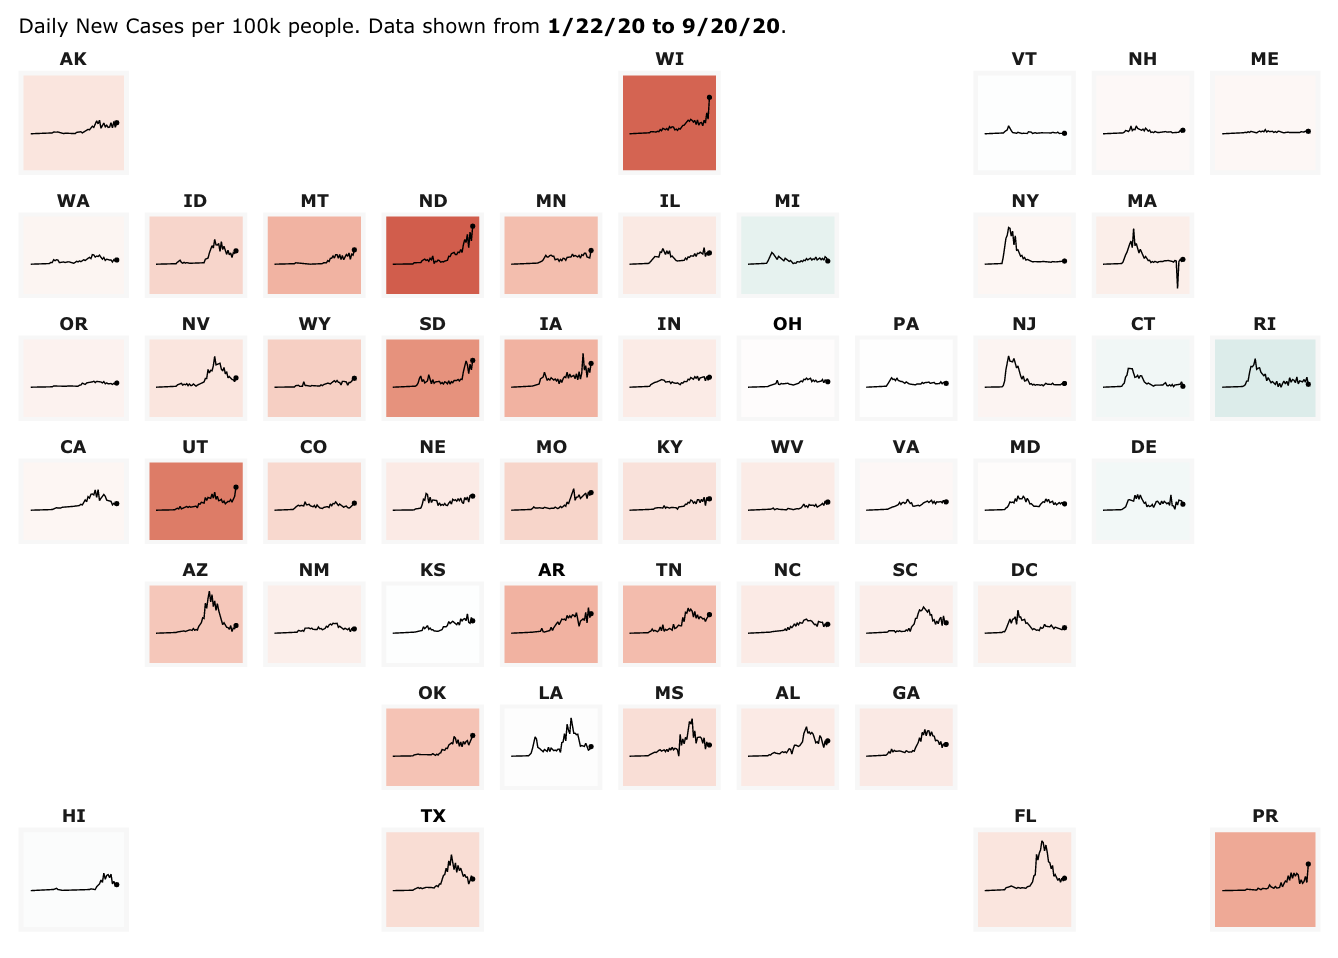
  
For questions that investigate impact, correlation, etc., you may need some auxiliary data. The following graph is plotted with a combination of COVID-19 death data from JHU and census data from world bank.  
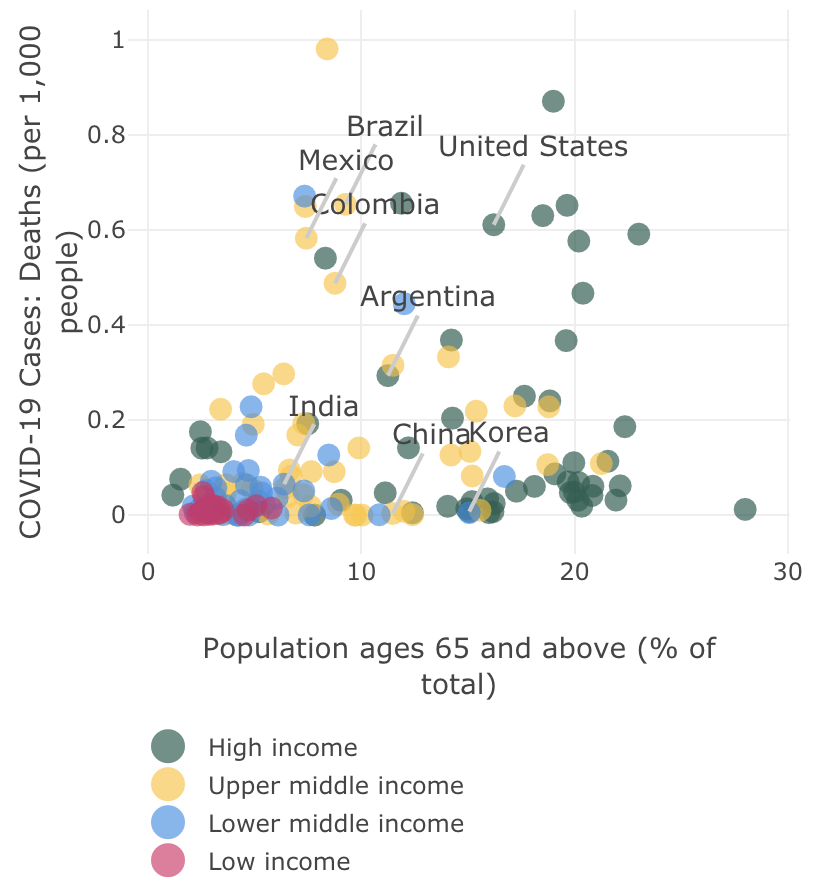

For questions like [How did events unfold in Hubei, China?](https://coronavirus.jhu.edu/data/hubei-timeline), you may need to find some event information from external resources such as news agencies, Wikipedia, etc.
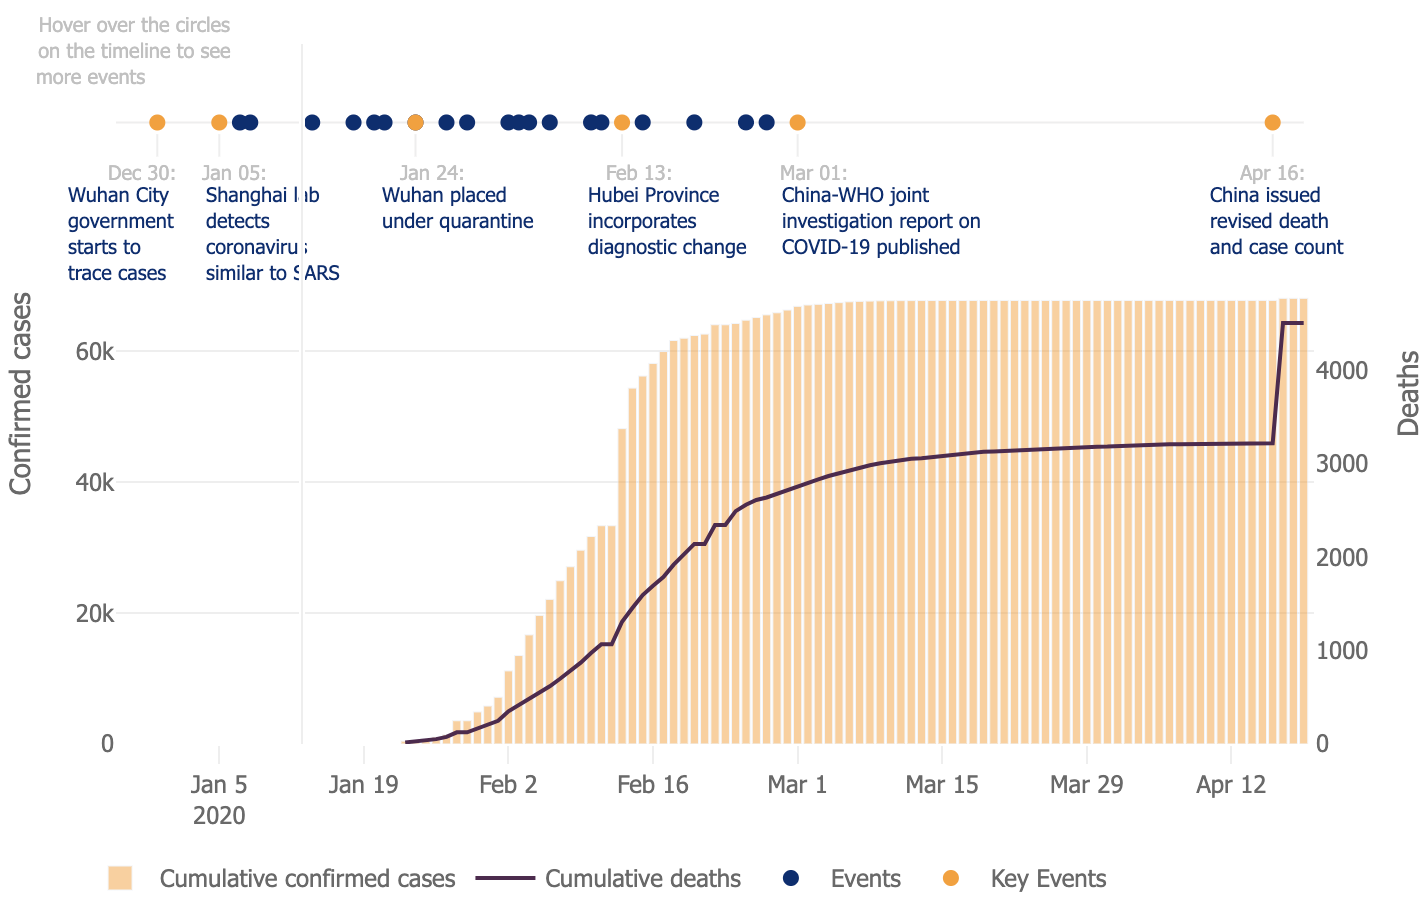

Keep in mind:
* You must utilize at least one file from the COVID-19_Main folder.
* Using auxiliary data is optional for this assignment. You may use any amount of auxiliary data from 1) the COVID-19_Auxiliary folder; 2) resources/databases listed above; and/or 3) any publicly accessible datasets/resources that you deemed useful.
* Your assignment will be graded by the appropriateness of data, scale, and other viz design choices.  

**Also, you may clean, manipulate, and transform the data as you like.**

In [32]:
# read in & prepare data for visualization
### your code here ###
import pandas as pd

######################## time_series_covid19_deaths_US.csv ########################

USconfirmed = pd.read_csv("COVID-19_MAIN/time_series_covid19_confirmed_US.csv")
USdeath = pd.read_csv("COVID-19_MAIN/time_series_covid19_deaths_US.csv")
ah = pd.read_csv("")

USconfirmed = USconfirmed.loc[USconfirmed['Province_State'] == "Texas"]
USconfirmed = USconfirmed.drop(columns=["UID","iso2","iso3","code3","FIPS","Lat","Long_","Country_Region","Combined_Key","Province_State"])
Counties2Compare = ["Dallas","Harris","Tarrant","Bexar","Travis"]
USconfirmed = USconfirmed.loc[USconfirmed['Admin2'].isin(Counties2Compare)]
USconfirmed = (USconfirmed.rename(columns={'Admin2':'County'})).set_index('County')

for date in (USconfirmed.columns).tolist():
    if eval(date[0]) < 3:
        USconfirmed = USconfirmed.drop(columns=[date])
        
ListofLists = USconfirmed.values.tolist()
counties = USconfirmed.index.values.tolist()
Dates = (USconfirmed.columns).tolist()

PlotDicionary = {}
for num in range(0,len(counties)):
    PlotDicionary.update({counties[num]:ListofLists[num]})

USconfirmed

######################## ResidentPopulationByCounty.xlsx ########################

USpopulation = pd.read_excel("COVID-19_Auxiliary/ResidentPopulationByCounty.xlsx", header = 3)

USpopulation = USpopulation.rename(columns={'Unnamed: 0':'County'})
USpopulation = USpopulation.drop(columns=["Census","Estimates Base",2010,2011,2012,2013,2014,2015,2016,2017,2018])
USpopulation = USpopulation[USpopulation['County'].str.contains(', Texas')]

for i, row in USpopulation.iterrows():
    NewCountyName = USpopulation.loc[i,'County']
    NewCountyName = NewCountyName[1:len(NewCountyName)]
    NewCountyName = NewCountyName[:-14]
    USpopulation.loc[i,'County'] = NewCountyName
    
USpopulation = (USpopulation.loc[USpopulation['County'].isin(Counties2Compare)]).set_index('County')

USpopulation

,2019
County,
Bexar,2003554.0
Dallas,2635516.0
Harris,4713325.0
Tarrant,2102515.0
Travis,1273954.0


**List of datasets you used**  
For data shipped with the assignment package, you just need to list file name(s).   
For the others, list the link to the data download page together with a short description for each of them.  
  
1. time_series_covid19_deaths_US.csv
2. ResidentPopulationByCounty.xlsx

## Visualize now!
Ultimately, you should produce a single image that effectively communicates the question you ask of the data. You must use a Python visualization toolkit as your key tool, but you are welcome to augment with other tools if you like (e.g., Photoshop, MS Paint, GIMP). For Python viz tools, you may use matplotlib, plotly, seaborn, geoplotlib, bokeh, networkx, or whatever else you can find.  

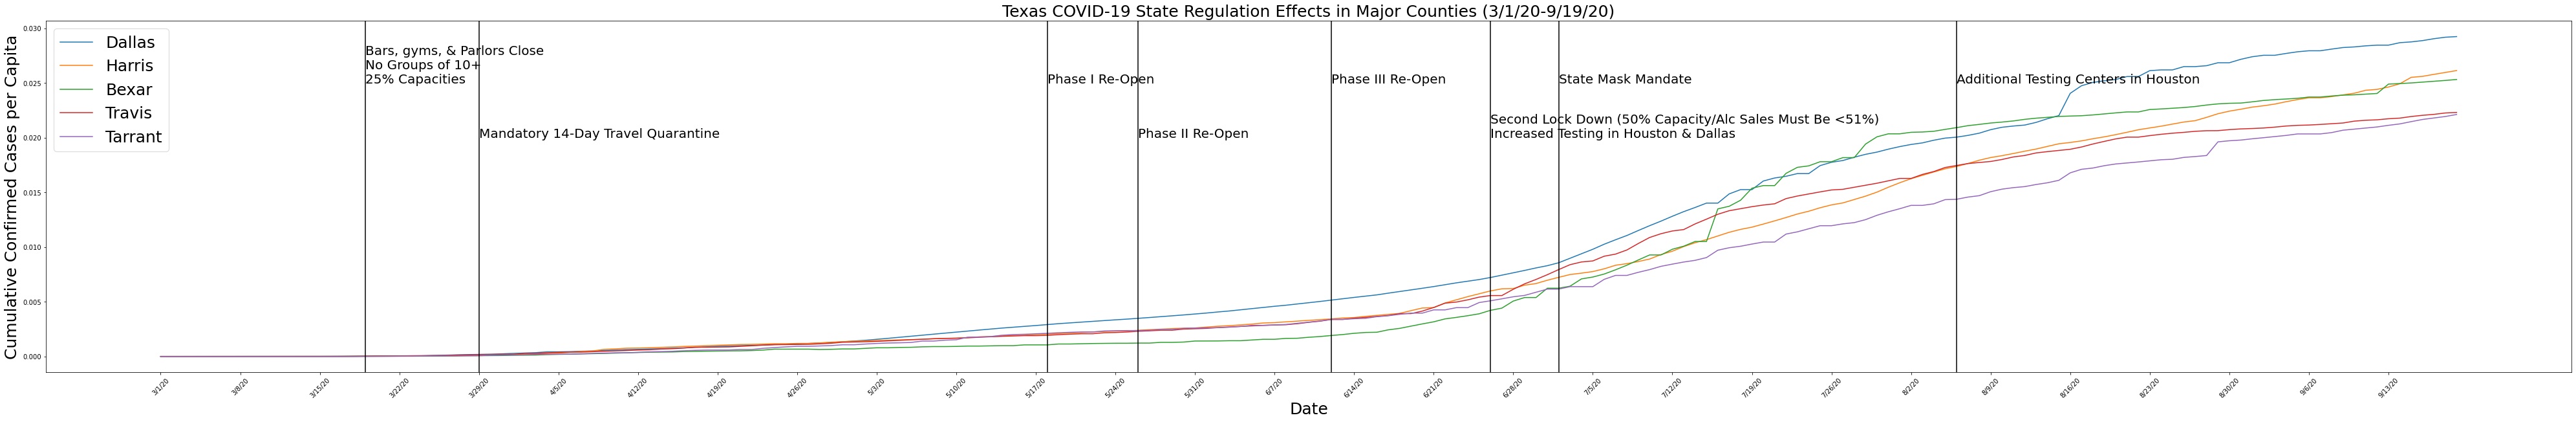

In [33]:
# read in & prepare data for visualization
### your code here ###
import matplotlib.pyplot as plt
import copy


######################## Create Plot ########################
orderedCounties = ["Dallas","Harris","Bexar","Travis","Tarrant"]
# for county in counties:
for county in orderedCounties:
    x = (USconfirmed.columns).tolist()
    y = PlotDicionary[county].copy()

    for num in range(0,len(y)):
        y[num] = y[num]/USpopulation.loc[county,2019]
    
    plt.plot(x,y,label = county)
    

######################## Label Plot ########################
plt.xlabel('Date')
plt.ylabel('Cumulative Confirmed Cases per Capita')
plt.title('Texas COVID-19 State Regulation Effects in Major Counties (3/1/20-9/19/20)')

######################## Edit Plot ########################
plt.legend(loc=2, prop={'size': 25})
plt.xticks(Dates[::7],rotation=45)
plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.rcParams["figure.figsize"] = (70,10)

######################## Add Event Timeline ########################
plt.axvline(x="3/19/20", color = 'k')
plt.text("3/19/20",0.025,"Bars, gyms, & Parlors Close\nNo Groups of 10+\n25% Capacities",fontsize=20)

plt.axvline(x="3/29/20", color = 'k')
plt.text("3/29/20",0.02,"Mandatory 14-Day Travel Quarantine",fontsize=20)

plt.axvline(x="5/18/20", color = 'k')
plt.text("5/18/20",0.025,"Phase I Re-Open",fontsize=20)

plt.axvline(x="5/26/20", color = 'k')
plt.text("5/26/20",0.02,"Phase II Re-Open",fontsize=20)

plt.axvline(x="6/12/20", color = 'k')
plt.text("6/12/20",0.025,"Phase III Re-Open",fontsize=20)

plt.axvline(x="6/26/20", color = 'k')
plt.text("6/26/20",0.02,"Second Lock Down (50% Capacity/Alc Sales Must Be <51%)\nIncreased Testing in Houston & Dallas",fontsize=20)

plt.axvline(x="7/2/20", color = 'k')
plt.text("7/2/20",0.025,"State Mask Mandate",fontsize=20)

plt.axvline(x="8/6/20", color = 'k')
plt.text("8/6/20",0.025,"Additional Testing Centers in Houston",fontsize=20)

######################## Display Plot ########################
plt.show()

If you utilized any post-editing tools (e.g., Photoshop, MS Paint, GIMP), insert your finalized image in this cell. Also, don't forget to upload the image file when submitting this notebook on Canvas.

``Make image insertion here if needed``

## Finally, a brief explanation describing your design. (a few paragraphs, 1/2 page or so).  
Your explanation should justify the design choices you have made. Why did you choose the particular visualization type? What motivated your choice of size, color, and scale? Why are they appropriate for what you are trying to communicate? Additionally, your explanation should document what you are trying to communicate, the benefits of your choice of visualization, as well as any downsides to your viz (e.g., are certain connections downplayed due to your choices?). 

---------------------- Question ----------------------
In my project, I wanted to determine whether or not the Texas state COVID-19 regulations had an effect on the cumulative confirmed cases per capita in major counties.

---------------------- Method ----------------------
I chose to look at major individual counties rather than the state as a whole because one county could have simply been worse at containing the virus than another – proving no correlation between the regulations and the # of cases. By analyzing the counties individually, it can be seen that they all behave about the same in relation to each new regulation.

I chose Harris, Dallas, Tarrant, Bexar, and Travis because they are the 5 most populated counties in Texas. They essentially represent Houston, Dallas, Fort Worth, San Antonio, and Austin.

Next, I chose to plot cumulative cases per capita, because while Harris had many more cases than Austin, it also had a much greater population density which needed to be accounted for. Prior to adjusting for cases per capita, Harris had around x4 the confirmed cases of Travis and Dallas had x3 than Travis. Afterwards dividing by county population, it can be seen that Travis didn’t do that much better (still better in comparison).

I made the X access the dates, where every X tick is the start of a new week. I did it this way because the rise in COVID-19 cases can’t really be seen in days. It takes a week or two to really see a trend. It’s also easier for us to interpret things in 7-day weeks rather than 4-5 day increments.

The legend is pretty simple. I color coded each county and the events so that the difference in county could be determined and to clarify what the black vertical markers were.

Regarding which regulations I chose, I went through and read every regulation which Governor Abbot passed in the past 5 months and chose the ones which I thought were the most crucial. Turns out, he made a lot of regulations. Almost 1 every day! That being said, and I’ll mention this later, many regulations are not taken into account; Abbot increased # of hospital beds, # of physicians, free masks, testing centers. I want to mention testing centers because I chose to mark increased testing in Harris and Dallas. Gov, Abbot specifically placed large testing centers in Harris and Dallas county, converting stadiums like minute maid park. While these state regulations didn’t affect other counties, they give evidence for why Harris and Dallas begin to surpass other counties case #s. More available testing = more confirmed cases.

I elongated the graph so that the regulation timeline and its effects could be better visualized. I didn’t want the labels to be crammed and I wanted the weekly trends to have time to play out.

---------------------- Results ----------------------
The five counties had a relatively low number of cases for 2 ½ months. This was when bars, gyms, and parlors were closed and everything else was open to only 25% capacity. 

Each county’s numbers began to climb significantly after each subsequent phase of re-opening – especially Phase III which opened the bars. Ideally, the second lock down (placing 50% restrictions and attempting to regulate bars) would have proven some effectiveness, however, bars have just started selling food items like chips or tacos – effectively becoming restaurants.

(Off-Topic: One might be able to say as bars become restaurants, COVID-19 has increased… so we should be the bars back!?)

Thee major conclusion is that the state regulations closing the state down, really helped in containing the virus. Once the state allowed counties to open back up, COVID-19 cases began to rise.

Like I said before, you can see cases in Harris and Dallas county start to rise after state regulated testing centers were installed, compared to the other counties which had no state officiated testing centers.

---------------------- Design Downsides ----------------------
It may have been easier to see direct correlations between regulations and COVID-19 had I done Daily New Cases per 100k rather than cumulative cases.

Like I mentioned before, there were also many other regulations which could contribute to both the increase and decrease of cases in different counties. Therefore, my data does not account for every regulation.